In [ ]:
import this

In [ ]:
this??

# Life is short. Use Python.

1. Sklearn https://github.com/apachecn/hands_on_Ml_with_Sklearn_and_TF/tree/dev/docs
2. Sklearn dataset: http://scikit-learn.org/stable/auto_examples/index.html#examples-based-on-real-world-datasets
3. Sklearn homepage: http://scikit-learn.org/stable/
4. Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
5. Tensorflowplayground http://playground.tensorflow.org/
6. Pypi https://pypi.org/
7. Github https://github.com/
9. Stackoverflow: https://stackoverflow.com/
10. Codecademy: https://www.codecademy.com/learn/learn-python
11. Titanic: https://www.kaggle.com/c/titanic

# Q&A
### 1. 文件路径问题：
####     windows 下的目录分隔符为 \\\，例如 C:\\\document\\\data
####     目录中有中文可能导致报错，建议使用英文命名文件夹

# 加载数据

In [1]:
import matplotlib
import sklearn
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
train = pd.read_csv('./data/train.csv', index_col = 'PassengerId') #返回一个pd.DataFrame
test = pd.read_csv('./data/test.csv', index_col = 'PassengerId')
submit = pd.read_csv('./data/gender_submission.csv', index_col = 'PassengerId')

In [3]:
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [4]:
train.shape

(891, 11)

In [98]:
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


# 预览

In [ ]:
train.dtypes

In [ ]:
train.describe()

In [ ]:
train.isna().sum()

In [ ]:
obj_cols = train.columns[train.dtypes == 'object']
for col in obj_cols:
    print(train[col].value_counts(dropna = False).head())
    print('='*50)


In [ ]:
_ = train.hist(bins = 20, figsize = (16,12))

In [ ]:
_ = pd.plotting.scatter_matrix(train, figsize = (16,12))

# 切分验证集

### 1. 随机采样

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_ = train.drop('Survived', axis =1)
Y_ = train['Survived']

In [26]:
X_train, X_vali, Y_train, Y_vali = \
train_test_split(X_, Y_, test_size = 0.2, random_state = 31)

In [ ]:
X_train.head()

### 2. 哈希采样

In [ ]:
import hashlib

In [ ]:
hash_function = hashlib.md5
tmp = hash_function(np.int64(17686))
tmp.digest()

In [ ]:
train.head()

In [ ]:
def split_train_test_by_index(*datas, test_ratio = 0.2, hash_function=hashlib.md5):
    res = []
    whether_in_test = lambda id_: hash_function(np.int64(id_)).digest()[-1] < 256 * test_ratio #ask sof what star mean
    for data in datas:
        ids = data.index.values
        in_test_set = pd.Series([whether_in_test(id_) for id_ in ids], index = data.index)
        train, vali = data.loc[~in_test_set], data.loc[in_test_set]
        res += [train, vali]
    return res

X_train, X_vali, Y_train, Y_vali = split_train_test_by_index(X_,Y_)

In [ ]:
Y_vali.shape[0]*1.0/Y_.shape[0]

In [ ]:
print('rate of male/femate %f' % (X_.Sex.value_counts()['male']/X_.Sex.value_counts()['female']))
print('rate of male/femate %f' % (X_train.Sex.value_counts()['male']/X_train.Sex.value_counts()['female']))

### 3. 分层采样

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, vali_index = list(split.split(X_, X_.Sex))[0]
X_train = X_.reindex(train_index)
X_vali = X_.reindex(vali_index)
Y_train = Y_.reindex(train_index)
Y_vali = Y_.reindex(vali_index)

In [ ]:
print('rate of male/femate %f' % (X_.Sex.value_counts()['male']/X_.Sex.value_counts()['female']))
print('rate of male/femate %f' % (X_train.Sex.value_counts()['male']/X_train.Sex.value_counts()['female']))

# 预处理



### 1. 处理空值

In [15]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline,FeatureUnion,Parallel

In [ ]:
X_.isna().sum()

In [ ]:
imputer = Imputer(strategy = 'most_frequent')
imputer.fit(X_)

In [ ]:
class A():
    def __init__(self, text = None):
        self.text = text
    def print_(self):
        print(self.text)
        
class B(A):
    def set_text(self, text):
        self.text = text
a_= A('hello world')

In [ ]:
a_.print_()

In [ ]:
b = B()
b.set_text('hey')
b.print_()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
class Deal_NAs(BaseEstimator, TransformerMixin):
    def __init__(self, drop_Cabin = True, strategy = 'most_frequent'):
        self.drop_Cabin = drop_Cabin
        self.fillna_with = 'NA'
        self.strategy = strategy
        self.imputer = Imputer(strategy = self.strategy)
    def fit(self, X_):
        numeric_cols = X_.columns[(X_.dtypes != 'object').values]
        numeric_ = X_[numeric_cols]
        self.imputer.fit(numeric_)
        return self
    def transform(self, X_):
        numeric_cols = X_.columns[(X_.dtypes != 'object').values]
        numeric_ = X_[numeric_cols]
        trans_numeric = self.imputer.transform(numeric_)
        X_[numeric_cols] = trans_numeric
        if self.drop_Cabin:
            X_ = X_.drop('Cabin',axis = 1)
        X_ = X_.fillna(self.fillna_with)
        return X_

In [ ]:
dn = Deal_NAs()
X_withoutNA = dn.fit_transform(X_train)

In [ ]:
X_withoutNA.isna().sum()

In [ ]:
X_withoutNA.Embarked.value_counts()

### 2. 处理类别变量 

In [10]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

In [9]:
class RobustLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.classes_ = []
        self.set_classes_ = None
        self.unseen_tag = 'unseen'
    def fit(self, list_):
        self.set_classes_ = set(list_)
        self.classes_ = list(self.set_classes_) + [self.unseen_tag]
        return self
    def transform(self, list_):
        list_ = [obj if obj in self.set_classes_ else self.unseen_tag for obj in list_]
        dct = dict(zip(self.classes_, range(len(self.classes_))))
        res = [dct[obj] for obj in list_]
        return res

In [ ]:
a = ['a','b','c','a']
rle = RobustLabelEncoder()
rle.fit_transform(a)
b = ['a','b','a','x','y','c']
rle.transform(b)

In [ ]:
lb  = LabelBinarizer()

In [ ]:
lb.fit([1,0,1,2])
lb.transform([0,1,0,1])

In [ ]:
lb.classes_

In [ ]:
LabelBinarizer??

In [ ]:
nlb = LabelBinarizer()
nlb.classes_ = np.array([0,1,2])
nlb.transform([0,1,1,2])

In [11]:
class Encode_CatCols(BaseEstimator, TransformerMixin):
    def __init__(self, onehot = True, drop = []):
        self.onehot = onehot
        self.drop = drop
        self.encoders = {}
        self.catCols_ = None
        if self.onehot:
            self.oh_encoders = {}
    def fit(self, X_):
        catCols = [colname for colname in X_.columns if X_[colname].dtype == 'object']
        
        for col in self.drop:
            catCols.remove(col)
            
        self.catCols = catCols
        
        for col in catCols:
            encoder = RobustLabelEncoder()
            tmp = encoder.fit_transform(X_[col].tolist())
            self.encoders[col] = encoder
            if self.onehot:
                oh_encoder = LabelBinarizer() #不训练
                oh_encoder.classes_ = np.array(range(len(encoder.classes_)))
                #print(encoder.classes_)
                self.oh_encoders[col] = oh_encoder
        return self
    
    def transform(self, X_):
        
        for col in self.drop:
            X_ = X_.drop(col, axis = 1)
            
        if self.onehot:
            new_cols = [X_]
            
        for col in self.catCols:
            encoder = self.encoders[col]
            X_[col] = encoder.transform(X_[col].tolist())
            if self.onehot:
                binary_colnames = [col+'_'+class_ for class_ in encoder.classes_]
                #if len(binary_colnames) == 2: binary_colnames = [binary_colnames[0]]
                values = self.oh_encoders[col].transform(X_[col].tolist())
                new_cols.append(pd.DataFrame(values, index = X_.index, columns = binary_colnames))
                
        if self.onehot:
            
            new_cols = pd.concat(new_cols, axis = 1)
            X_ = new_cols.drop(self.catCols, axis = 1)
        return X_

In [ ]:
ec = Encode_CatCols(onehot = True, drop = ['Name','Ticket'])
ec.fit_transform(X_withoutNA).head()

In [13]:
from sklearn.pipeline import Pipeline

In [16]:
pipeline = Pipeline([('deal_na', Deal_NAs()),('encode_cat', Encode_CatCols(onehot = False, drop = ['Name','Ticket']))])

In [18]:
X_prepared = pipeline.fit_transform(X_)
X_prepared.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3.0,1,22.0,1.0,0.0,7.2500,2
2,1.0,0,38.0,1.0,0.0,71.2833,0
3,3.0,0,26.0,0.0,0.0,7.9250,2
4,1.0,0,35.0,1.0,0.0,53.1000,2
5,3.0,1,35.0,0.0,0.0,8.0500,2
6,3.0,1,24.0,0.0,0.0,8.4583,1
7,1.0,1,54.0,0.0,0.0,51.8625,2
8,3.0,1,2.0,3.0,1.0,21.0750,2
9,3.0,0,27.0,0.0,2.0,11.1333,2


In [27]:
#X_prepared = pipeline.fit_transform(X_)
X_train_p = pipeline.fit_transform(X_train)
X_vali_p = pipeline.transform(X_vali)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### 3. 处理数值变量

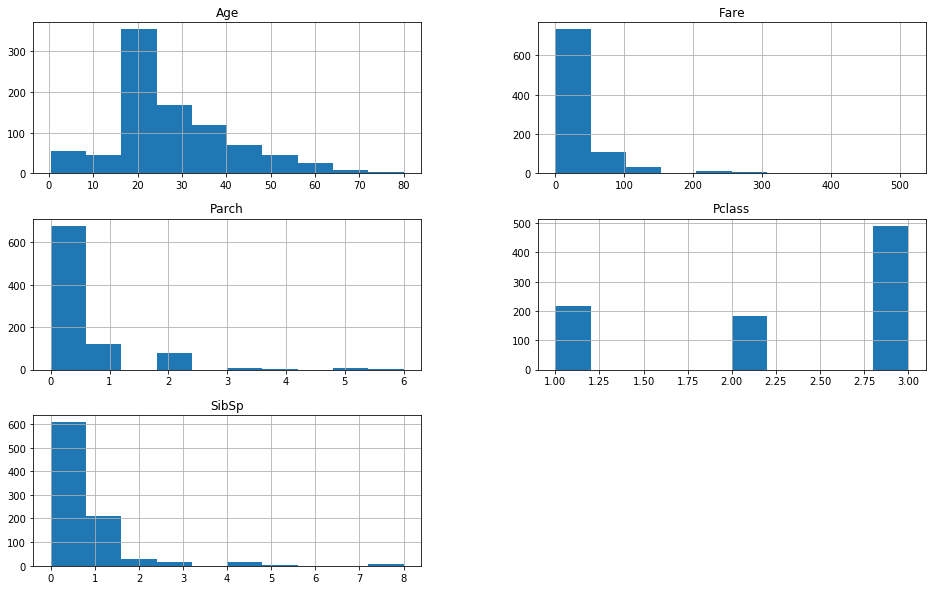

In [40]:
_ = X_.hist(figsize = (16,10))

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
class Scale_NumCols(BaseEstimator, TransformerMixin):
    def __init__(self, colnames = None, take_log = False):
        self.cols_to_transform = colnames
        self.take_log = take_log
        self.scaler = StandardScaler()
    def fit(self, X_):
        X_ = X_.copy()
        if self.cols_to_transform is None:
            self.cols_to_transform = [col for col in X_.columns if X_[col].dtype != 'object']
        if type(self.take_log) == bool:
            self.take_log = [self.take_log for col in self.cols_to_transform]
        else:
            assert len(self.take_log)==len(self.cols_to_transform)
        for col, log in zip(self.cols_to_transform, self.take_log):
            if log:
                X_.loc[:,col] = np.log(X_[col]+1)
        self.scaler.fit(X_[self.cols_to_transform])
        return self
    def transform(self, X_):
        for col, log in zip(self.cols_to_transform, self.take_log):
            if log:
                X_.loc[:,col] = np.log(X_[col]+1)
        X_.loc[:,self.cols_to_transform] = self.scaler.transform(X_[self.cols_to_transform])
        return X_

In [ ]:
X_.head()

In [49]:
scale_num = ('scale_num', Scale_NumCols(['Age', 'SibSp', 'Parch', 'Fare'], take_log = True))
pipeline = Pipeline([('deal_na', Deal_NAs()),('encode_cat', Encode_CatCols(drop = ['Name','Ticket'])),scale_num])

In [50]:
#X_prepared = pipeline.fit_transform(X_)
X_train_p = pipeline.fit_transform(X_train)
X_vali_p = pipeline.transform(X_vali)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


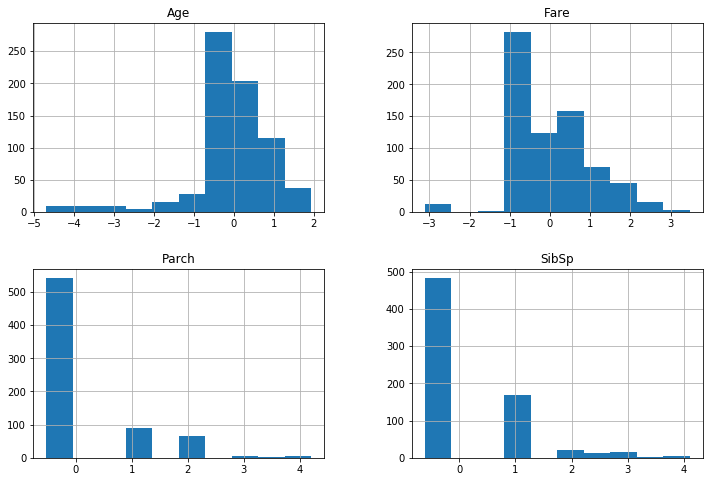

In [51]:
_ = X_train_p[['Age', 'SibSp', 'Parch', 'Fare']].hist(figsize = (12,8))

# 选择并训练模型

In [19]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import AdaBoostClassifier as abc
from sklearn.ensemble import GradientBoostingClassifier as gbc

In [100]:
model = lr(C = 1)
model = dtc(min_samples_split = 10, max_features = 5)
model = abc(dtc(max_depth = 4), n_estimators=100)
model = gbc(n_estimators= 200)
#model = rfc(n_estimators=200 ,min_samples_split = 5)
model.fit(X_train_p, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [101]:
model.score(X_train_p, Y_train)

0.9339887640449438

In [102]:
model.score(X_vali_p, Y_vali)

0.8212290502793296

In [56]:
coef_df = pd.DataFrame({'name':X_train_p.columns.tolist(), 'coef':model.coef_[0]})
coef_df.sort_values('coef', ascending = False)

,coef,name
5,1.804601,Sex_female
9,0.527732,Embarked_Q
4,0.391642,Fare
8,0.318188,Embarked_C
11,0.157068,Embarked_NA
10,0.043841,Embarked_S
7,0.000000,Sex_unseen
12,0.000000,Embarked_unseen
3,-0.100079,Parch
2,-0.379331,SibSp


# 模型评估

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix?

In [59]:
Y_pred = model.predict(X_vali_p)
print(classification_report(Y_vali, Y_pred))

             precision    recall  f1-score   support

          0       0.80      0.86      0.83        99
          1       0.81      0.74      0.77        80

avg / total       0.80      0.80      0.80       179



In [64]:
True_Negative = dff.iloc[0,0]
True_Positive = dff.iloc[1,1]
False_Negative = dff.iloc[1,0]
False_Positive = dff.iloc[0,1]

RECALL = True_Positive/(True_Positive + False_Negative)
RECALL

0.7375

In [65]:
PRECISION = True_Positive/(True_Positive + False_Positive)
PRECISION

0.8082191780821918

In [69]:
F1 = 2/(1./RECALL+1./PRECISION)
F1

0.7712418300653594

In [70]:
from sklearn.metrics import roc_curve

In [71]:
import matplotlib.pyplot as plt

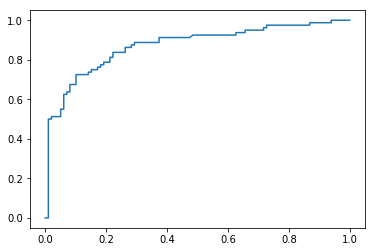

In [72]:
Y_pred_proba = model.predict_proba(X_vali_p)[:,1]
fpr,tpr,thres=roc_curve(Y_vali, Y_pred_proba)
plt.plot(fpr,tpr)

In [73]:
from sklearn.metrics import roc_auc_score

In [74]:
roc_auc_score(Y_vali, Y_pred_proba)

0.8721590909090909

# 参数微调
### 1. 网格搜索

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [92]:
model = gbc()
param_grid = [{'n_estimators':[50,100,200,400],'max_depth':[2,3,4,7],'min_samples_split':[7,9,11]}]
grid_search = GridSearchCV(model, param_grid, cv =5, n_jobs = 4)
grid_search.fit(X_train_p, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'n_estimators': [50, 100, 200, 400], 'max_depth': [2, 3, 4, 7], 'min_samples_split': [7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_split': 11, 'n_estimators': 100}

In [94]:
best = grid_search.best_estimator_
best.score(X_vali_p, Y_vali)

0.8268156424581006

### 2. 随机搜索

In [96]:
model = rfc()
param_grid = {'n_estimators':[50,100,200,400],'max_depth':[2,3,4,7],'min_samples_split':[3,5,7]}
rand_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter = 40, cv =5, n_jobs = 4)
_ = rand_search.fit(X_train_p, Y_train)

In [97]:
rand_search.best_params_
rand_search.best_score_
rand_search.best_index_

{'max_depth': 7, 'min_samples_split': 7, 'n_estimators': 200}

0.824438202247191

29

# 特征工程

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures?

In [95]:
dataset = X_
dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

PassengerId
1          Mr
2         Mrs
3        Miss
4         Mrs
5          Mr
6          Mr
7          Mr
8      Master
9         Mrs
10        Mrs
11       Miss
12       Miss
13         Mr
14         Mr
15       Miss
16        Mrs
17     Master
18         Mr
19        Mrs
20        Mrs
21         Mr
22         Mr
23       Miss
24         Mr
25       Miss
26        Mrs
27         Mr
28         Mr
29       Miss
30         Mr
        ...  
862        Mr
863       Mrs
864      Miss
865        Mr
866       Mrs
867      Miss
868        Mr
869        Mr
870    Master
871        Mr
872       Mrs
873        Mr
874        Mr
875       Mrs
876      Miss
877        Mr
878        Mr
879        Mr
880       Mrs
881       Mrs
882        Mr
883      Miss
884        Mr
885        Mr
886       Mrs
887       Rev
888      Miss
889      Miss
890        Mr
891        Mr
Name: 0, Length: 891, dtype: object

# 输出结果

In [107]:
submit.head()

test_p = pipeline.transform(test)
Y_test_pred = model.predict(test_p)

test['Survived'] = Y_test_pred
result = test[['Survived']]
result.to_csv('result.csv', header = True, index = True)

cfm = confusion_matrix(Y_vali, Y_pred, labels = [0,1])
dff = pd.DataFrame(cfm, columns = ['predict_die','predict_survive'], index = ['true_die','true_survive'])
dff

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
